# In binary classification settings

In [2]:
# Create simple data
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

# add noisy features
random_state = np.random.RandomState(0);
n_samples , n_features = X.shape
X = np.c_[X,random_state.randn(n_samples,200*n_features)];

# Limit to the two first classes, and split into training and test
X_train,X_test,y_train,y_test = train_test_split(X[y<2],y[y<2],test_size = .5, random_state = random_state);

# Create a simple Classifier
LogisticR = LogisticRegression();
LogisticR.fit(X_train,y_train);
y_score = LogisticR.decision_function(X_test);

In [5]:
# Compute the average precision score
from sklearn.metrics import average_precision_score
average_score = average_precision_score(y_test,y_score);
print("Average precision-recall score :{0:0.2f}".format(average_score))

Average precision-recall score :0.87


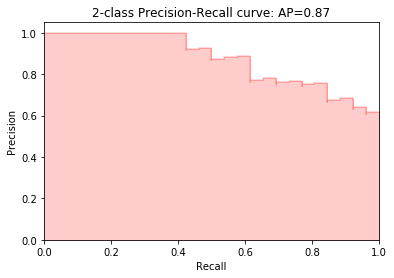

In [9]:
# Plot the precision-recall score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision,recall,thredholds = precision_recall_curve(y_test,y_score);

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall,precision,color="r",alpha = 0.2,where = "post")
plt.fill_between(recall,precision,alpha = 0.2,color = "r",**step_kwargs)
plt.xlabel("Recall");
plt.ylabel("Precision")
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_score))
plt.show()

# In multi-label settings

In [13]:
# create multi-label data, fit, and predict

from sklearn.preprocessing import label_binarize
from sklearn import svm
# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [14]:
# The average precision score in multi-label settings

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.46


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.46')

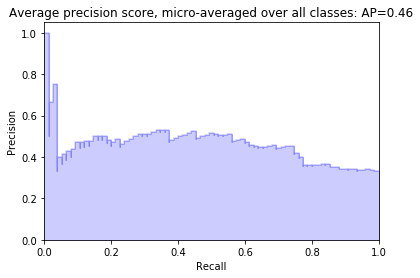

In [15]:
# Plot the micro-averaged Precision-Recall curve

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))